<a href="https://colab.research.google.com/github/thinkinginmath/ML-tutorials/blob/main/simple_linear_regression_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression Exercise

In this notebook, we'll generate and analyze a dataset based on the model:

$$ Y = 2 + 3.5X + e $$

where $ e $ is a random error term.

It helps to illustrate some basic facts on ordinary linear regression. The goal of OLS is to minimize the sum of the squared differences (residuals) between the observed values (dependent variable) and the values predicted by the model. Mathematically, if $y$ is the observed value, and
$\hat{y}$
  is the predicted value, OLS tries to minimize:
$$ \sum (y-\hat{y})^2$$


# What python package to use for OLS?

Both `statsmodels.api` and `scikit-learn` are popular libraries in Python for linear regression, but they cater to somewhat different use cases and audiences. Here's a comparison of their pros and cons:

### `statsmodels.api`

#### Pros:

1. **Detailed Statistics**: `statsmodels` provides detailed summary statistics for the model, which include **p-values**, **confidence intervals**, **information criteria** (like AIC and BIC), and many other diagnostics. This is particularly useful for hypothesis testing and inferential purposes.

2. **Formula Interface**: Through the `formula.api`, `statsmodels` allows for the specification of models using R-like formulas, which can be very intuitive for users coming from a statistical background or for those who are familiar with R.

3. **Diverse Methods**: Beyond just linear regression, `statsmodels` offers a wide variety of statistical models, such as generalized linear models (GLM), robust linear models, and many more.

4. **Diagnostic Tools**: `statsmodels` has built-in functions for plotting residuals, leverage, influence points, etc., which are essential for diagnosing linear regression models.

#### Cons:

1. **Less User-Friendly for Machine Learning**: While it's powerful for statistical modeling, `statsmodels` isn't geared specifically for machine learning workflows. For example, it doesn't integrate as seamlessly with tools like `GridSearchCV` or `Pipeline` in scikit-learn.

2. **Performance**: For very large datasets or for applications requiring real-time predictions, `statsmodels` might not be as performant as other ML-focused libraries.

### `scikit-learn`

#### Pros:

1. **Machine Learning Ecosystem**: `scikit-learn` is built specifically for machine learning. This means it integrates smoothly with other tools in the ML ecosystem, is designed for predictive modeling, and offers utilities for tasks like cross-validation, grid search, and pipelines.

2. **Consistency Across Algorithms**: One of the strengths of `scikit-learn` is its consistent API. Once you understand how to use one algorithm, using others becomes intuitive. This consistency can make it easier to switch between models or combine them.

3. **Performance**: `scikit-learn` is optimized for performance, especially with large datasets.

4. **Preprocessing Tools**: `scikit-learn` offers a wide array of tools for data preprocessing, feature selection, and feature extraction.

#### Cons:

1. **Less Detailed Statistics**: Unlike `statsmodels`, `scikit-learn` doesn't provide detailed statistical summaries out of the box. While you can compute most of these statistics manually, it requires extra effort.

2. **No Formula Interface**: The library doesn't support the R-like formula interface that some users might find convenient.

### Others (e.g., `tensorflow`, `pytorch`):

There are other libraries like TensorFlow, PyTorch, etc., which are primarily deep learning libraries but can also be used for linear regression.

#### Pros:

1. **Flexibility**: Can build custom loss functions, custom layers, and more complex models beyond simple linear regression.
  
2. **GPU Acceleration**: Deep learning libraries are optimized to run on GPUs, which can significantly speed up computations, especially for large datasets.

#### Cons:

1. **Overhead**: For a simple linear regression, using deep learning libraries might be overkill. They come with overhead both in terms of computational requirements and code complexity.

2. **Learning Curve**: These libraries have a steeper learning curve compared to `scikit-learn` or `statsmodels` if one is just aiming for linear regression.

In summary, the best choice depends on the user's needs. If you are looking for detailed statistics and diagnostics, `statsmodels` is your go-to. If you're aiming for predictive modeling within a larger machine learning pipeline, `scikit-learn` is more appropriate. For complex models or if you're already working within a deep learning framework, TensorFlow or PyTorch might be suitable.

Here, we will use `statsmodels` in this short tutorial.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Setting a random seed for reproducibility
np.random.seed(42)

# Generating data
n = 100
X = np.linspace(0, 10, n)
e = np.random.normal(0, 2, n)
Y = 2 + 3.5*X + e

# Creating a DataFrame for better handling
data = pd.DataFrame({'X': X, 'Y': Y})

data.head()

,X,Y
0,0.00000,2.993428
1,0.10101,2.077007
2,0.20202,4.002448
3,0.30303,6.106666
4,0.40404,2.945835


### Fitting Simple Linear Regression

In [2]:
# Adding a constant term for the intercept
X_const = sm.add_constant(X)

# Fitting a simple linear regression model
model = sm.OLS(Y, X_const).fit()

# Extracting the predicted values
data['Predicted_Y'] = model.predict(X_const)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     3181.
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           1.63e-76
Time:                        17:25:56   Log-Likelihood:                -200.97
No. Observations:                 100   AIC:                             405.9
Df Residuals:                      98   BIC:                             411.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6544      0.362      4.570      0.000       0.936       2.373
x1             3.5276      0.063     56.397      0.000       3.403       3.652
==============================================================================
Omnibus:                        0.521   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.518
Skew:                          -0.167   Prob(JB):                        0.772
Kurtosis:                       2.885   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

   
 **Goodness-of-Fit and Model Information**:
   - **Log-Likelihood:**  This measure indicates how well the model fits the observed data; a higher value indicates a better fit.
   - **AIC:** The Akaike Information Criterion (AIC) value  can be used to compare the goodness of fit of different models, penalizing for model complexity. Lower values are better.
   - **BIC:** The Bayesian Information Criterion (BIC) is  used to compare models but with a sterner penalty for complexity. Again, lower is better.
   - **Df Residuals:** The number of degrees of freedom  is calculated as (Number of observations - Number of parameters in the model).

 **Test Statistics**:
   - **F-statistic:**  This statistic tests the hypothesis that all coefficients (except the intercept) are equal to zero. The very high value suggests that at least one predictor variable is statistically significant.
   - **Prob (F-statistic):** The associated p-value, which is extremely close to zero. This confirms the above: the model's predictors (in this case, just \(x1\)) are significant.
   - **Omnibus:** Tests the assumption of the homogeneity of variance (homoscedasticity) of the residuals. A value close to zero suggests non-uniform variance.
   - **Prob(Omnibus):** The associated p-value. A high p-value (generally > 0.05) suggests that the residuals have uniform variance across predicted values.
   - **Durbin-Watson:**  which tests for autocorrelation in the residuals.
   - **Jarque-Bera (JB):** Tests the assumption that the residuals are normally distributed.
   - **Prob(JB):** The associated p-value . A high p-value suggests that the residuals are normally distributed.
   - **Skew:** Measures the skewness of the distribution of the residuals. A value close to zero suggests that residuals are symmetrically distributed.
   - **Kurtosis:** Measures the 'tailedness' of the distribution of the residuals.
   - **Cond. No.:** The condition number is \(11.7\). Higher values may indicate multicollinearity or other numerical problems.

 **Coefficients**:
   - **const:**
   - **x1:**

**Summary**:
The OLS regression results suggest that:
- The predictor variable \(x1\) is a strong and significant predictor of the dependent variable.
- The model fits the data well, with both AIC and BIC providing relatively low values for model comparisons.
- Residuals seem to have uniform variance across predicted values, are not autocorrelated, and are approximately normally distributed.
- There's no concern of multicollinearity as only one predictor is involved.

In terms of modeling, **this is a strong and clear result.**

### Plotting Predicted vs. Sample Values

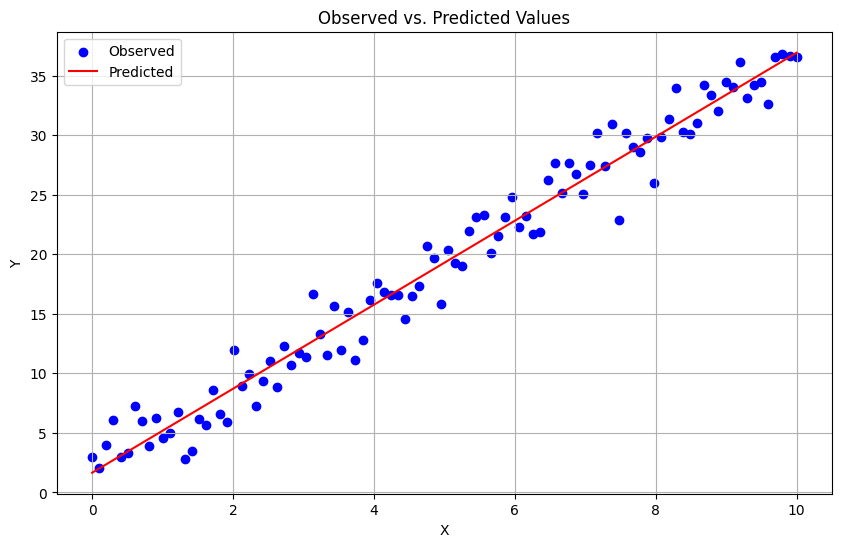

In [3]:
# Plotting the observed vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], color='blue', label='Observed')
plt.plot(data['X'], data['Predicted_Y'], color='red', label='Predicted')
plt.title('Observed vs. Predicted Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

### Evaluating Error Variance

In [4]:
# Calculating the Residual Sum of Squares (RSS)
RSS = np.sum((data['Y'] - data['Predicted_Y'])**2)

# Calculating the error variance
error_variance = RSS / (n - 2)
error_variance

3.326141687747258

### Evaluating SE$(\beta_1)$  and  SE$(\beta_0)$

In [5]:
# Calculating SE(beta_1)
SE_beta1 = np.sqrt(error_variance / np.sum((data['X'] - data['X'].mean())**2))

# Calculating SE(beta_0)
SE_beta0 = np.sqrt(error_variance * (1/n + (data['X'].mean()**2) / np.sum((data['X'] - data['X'].mean())**2)))

SE_beta1, SE_beta0

(0.06254864503003095, 0.3620355531640407)

### Finding the 95% Confidence Interval for $\beta_1 $

In [6]:
# Finding the t critical value for 95% CI with n-2 degrees of freedom
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, n-2)

# Calculating the confidence interval for beta_1
CI_beta1_lower = model.params[1] - t_critical * SE_beta1
CI_beta1_upper = model.params[1] + t_critical * SE_beta1

CI_beta1_lower, CI_beta1_upper

(3.403460784292728, 3.6517122850538963)

### Why Use the Student's t-distribution in Regression Analysis?

In regression analysis, when estimating the coefficients and their confidence intervals, we're dealing with estimates derived from sample data, not the entire population. When the population variance is unknown (as is often the case in regression), the distribution of the sample mean (or coefficient estimates) doesn't follow a normal distribution, especially for small sample sizes. Instead, it follows the *Student's t-distribution*.

The t-distribution is similar in shape to the normal distribution but has heavier tails. The heaviness of the tails decreases as the sample size increases, and the t-distribution approaches the normal distribution.

## Probability density function of student's t-distribution

![Probability density function](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Student_t_pdf.svg/650px-Student_t_pdf.svg.png)

The main reasons for using the t-distribution are:

1. **Unknown Population Variance**: In regression, we don't know the true variance of the error terms in the population. We estimate it using our sample. This estimated variance introduces additional uncertainty, which is captured by the t-distribution.
  
2. **Small Sample Size**: For small sample sizes, the t-distribution provides a more accurate representation of the uncertainty in our coefficient estimates. As the sample size grows, the t-distribution becomes closer to the normal distribution.

### Comparing t-critical with z-critical:

For large sample sizes, the critical value from the t-distribution `t-critical` approaches the critical value from the standard normal distribution `z-critical`. For a 95% confidence interval:
- `z_critical` is approximately 1.96 (from the standard normal distribution).
- `t_critical` depends on the sample size (or degrees of freedom).

In our dataset with 100 observations, `t_critical` is approximately $1.9845$, which is very close to `z_critical` = 1.96 . The difference would be more pronounced with smaller sample sizes.

In [7]:
# Computing z-critical for 95% CI from standard normal distribution
z_critical = stats.norm.ppf(1 - alpha/2)

z_critical, t_critical

(1.959963984540054, 1.984467454426692)

# `stats.norm.ppf` function

The function `stats.norm.ppf` refers to the Percent-Point Function (PPF) or the Quantile Function for the normal distribution. It is essentially the inverse of the Cumulative Distribution Function (CDF). Given a probability $ p$, the PPF gives the value $x$  such that:

$$ P(X \leq x) = p $$

For the standard normal distribution:

- `stats.norm.ppf(0.5)` will return \( 0 \) because the median (50th percentile) of the standard normal distribution is \( 0 \).
- `stats.norm.ppf(0.975)` will return approximately \( 1.96 \) because about 97.5% of the data in a standard normal distribution lie below \( 1.96 \).

### Usage:

``` python
from scipy import stats

# Get the 95th percentile of the standard normal distribution
quantile_95 = stats.norm.ppf(0.95)
print(quantile_95)
```

In the context of hypothesis testing, the PPF function is particularly useful for determining critical values. For instance, for a two-sided test at the 0.05 significance level, the critical z-scores are
$$ z = \pm \text{stats.norm.ppf}(1 - 0.025) $$,
 which are approximately $\pm 1.96 $.

In [11]:
from scipy import stats

# Get the 95th percentile of the standard normal distribution
quantile_95 = stats.norm.ppf(0.95)
print(quantile_95)

# Get the 97.5th percentile of the standard normal distribution
quantile_975 = stats.norm.ppf(0.975)
print(quantile_975)

1.6448536269514722
1.959963984540054
